# Coronavirus exploratory analysis
## *Hung Dinh*

This notebook demonstrate some exploratory analysis on the coronavirus pandemic in 2020. The outbreak was started in Wuhan (Hubei, China) in late December 2019, spread out quickly and then renamed to Covid-19 in March 2020.

First I carry out some analysis on the latest update summarized at https://www.worldometers.info/coronavirus/. A map showing countries with confirmed case is made for demonstration.

Secondly I make a more detailed analysis in Vietnam. The data was collected by my wife since the first case detected.

In [27]:
# These lines fix plotly.express
! pip install plotly --upgrade
! pip install plotly
import plotly.express as px

Requirement already up-to-date: plotly in /opt/conda/envs/Python36/lib/python3.6/site-packages (4.5.4)


In [28]:
import requests as requests
import pandas as pd
import matplotlib.dates as mdates # make time series for accumulative case
# %matplotlib inline
import json, urllib # extract location/country from geojson file

# 1. Coronavirus world map

### Collect coronavirus table

I collect data from [worldometers](https://www.worldometers.info/coronavirus/):

In [29]:
df = pd.read_html('https://www.worldometers.info/coronavirus/')[0]  # Scrape web page

Clean

In [30]:
df = df[:-1] # remove last row (Total)
df.fillna(0, inplace = True)
df=df.rename(columns = {'Country,Other':'Country'})

### Collect country code for mapping

I then collect a table of 3-letter country codes (ISO 3166-1 alpha-3) from [wiki](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3). The country names have been edited to match names used in the coronavirus summary table above.

In [117]:
countrycode = pd.read_csv("https://raw.githubusercontent.com/nhohung/coronavirusmap/master/countrycode_fixname.csv")
countrycode['count']=0

### Assign coronavirus to corresponding country

In [118]:
for row in df.iterrows():
    cty = row[1]['Country']
    countrycode.loc[countrycode['country']==cty, 'count'] = row[1]['TotalCases']

### Create map

In [121]:
fig = px.choropleth(countrycode, locations="code",
                    color="count", # lifeExp is a column of gapminder
                    color_continuous_scale=[(0, 'rgb(255, 255, 213)'), (0.1, "orange"), (0.9, "red"), (1, "red")],
                    hover_name="country", # column to add to hover information
                    # color_continuous_scale=px.colors.sequential.Plasma
#                     projection = 'orthographic',
                    projection = 'natural earth',
                    )
# fig.update_geos(fitbounds="locations", visible=True)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [37]:
import plotly.graph_objects as go

In [111]:
import numpy as np

In [132]:
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.01, 'rgb(218,218,235)'],
    [0.02, 'rgb(188,189,220)'],
    [0.03, 'rgb(158,154,200)'],
    [0.05, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

endpts = list(np.linspace(1, 12, len(colorscale) - 1))

fig = go.Figure(data = go.Choropleth(
    locations = countrycode['code'],
    z = countrycode['count'],
    text=countrycode['country'],
#     colorscale = colorscale,
    colorscale = scl,
    colorbar_title = 'Số ca nhiễm<br>(người)',
    marker=go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color='rgb(255,255,255)',
            width=1.5
        ))
))

fig.show()

In [136]:
fig = go.Figure(data = go.Choropleth(
    locations = countrycode['code'],
    z = countrycode['count'],
    text=countrycode['country'],
    colorscale = 'Inferno',
    colorbar_title = 'Số ca nhiễm<br>(nghìn người)',
    zmax = 10000,
    zmin=0,
    marker_line_color='grey',
    marker_line_width = 1,
    colorbar_tickprefix = 'k',
))

fig.update_layout(
    title_text = 'Confirmed coronavirus cases worldwide',
    geo = dict(
        projection=go.layout.geo.Projection(
            type='orthographic'),
        showframe=False,
        showcoastlines = False,
        showlakes=True,
        lakecolor = 'rgb(0,0,0)'
    ),
    annotations=[dict(
        x=0.55,
        y=0.2,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.worldometers.info/coronavirus/">\
            Worldometer</a>',
        showarrow=True
    )]
)

fig.show()


In [70]:
for col in countrycode.columns:
    countrycode[col] = countrycode[col].astype(str)

countrycode['info'] = countrycode['country'] + ': ' + countrycode['count']

fig = go.Figure(data = go.Choropleth(
    locations = countrycode['code'],
    z = countrycode['count'].astype(float),
#     colorscale = 'Reds',
    colorscale=[(0, 'rgb(255, 255, 213)'), (0.1, "orange"), (0.9, "red"), (1, "red")],
    colorbar_title = 'Số ca nhiễm',
    text = countrycode['info'],
    zmax = 30000,
    zmin=0,
    marker_line_color='grey'
))

fig.update_layout(
    title_text = 'Confirmed coronavirus cases worldwide',
    geo = dict(
        showlakes=True,
        lakecolor = 'rgb(0,0,0)'
    )
)

fig.show()


# 2. Vietnam

### Load data and clean

In [10]:
df = pd.read_excel('https://raw.githubusercontent.com/nhohung/coronavirusmap/master/Covid-19.xlsx', skiprows = 1)

# df = df.drop(['Unnamed: 0', 'Unnamed: 12', 'Nơi mắc.1', 'Unnamed: 14'], axis = 1)  ### on IBM
df = df.drop(['Unnamed: 0', 'Hạng bay', 'Chuyến bay', 'Ghi chú'], axis = 1)          ### on CoLab

### Summary by province

In [11]:
df1 = df['Nơi mắc'].value_counts()

Make vertical bar plot

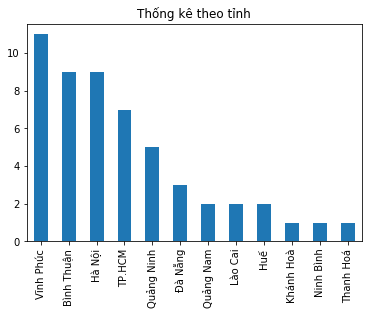

In [13]:
df1.plot(kind='bar', title='Thống kê theo tỉnh')

Make horizontal bar plot:

Text(0, 0.5, 'Tỉnh')

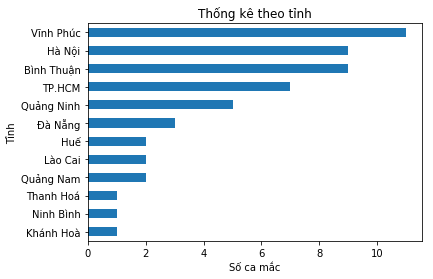

In [15]:
df1.sort_values(inplace = True)
ax = df1.plot(kind='barh', title='Thống kê theo tỉnh')
ax.set_xlabel('Số ca mắc')
ax.set_ylabel('Tỉnh')

### Summary by country

In [16]:
df['Quốc tịch'].fillna('Việt Nam', inplace = True)
df2 = df['Quốc tịch'].value_counts()

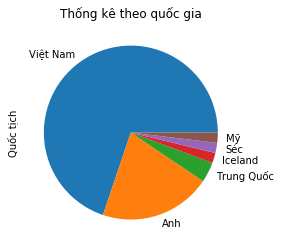

In [17]:
df2.plot(kind='pie', title='Thống kê theo quốc gia')

### Plot accumulative case by time

In [18]:
# Count case in each day, then sort
df3 = pd.DataFrame(df['Ngày mắc'].value_counts().sort_index())

# Calculate cummulative sum by day
df3 = df3.cumsum()

# Make time series axis: fill in all date
idx = pd.date_range(min(df3.index), max(df3.index))

# Fill all date into data, assign zero values
df3 = df3.reindex(idx, fill_value=0)

# Replace zeros from previous date
df3 = df3.replace(to_replace=0, method='ffill')


Make a plot

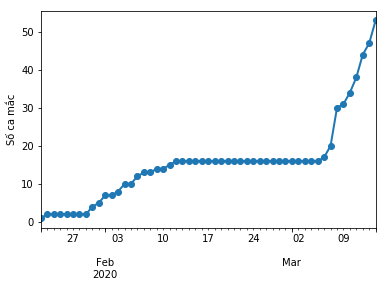

In [19]:
ax = df3.plot(linewidth=2, marker = 'o')
ax.set_ylabel('Số ca mắc')
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.get_legend().remove()

### Visualize cases on map

Filter cases from Vietnam and summary by province

In [20]:
df4 = df[df['Quốc tịch']=='Việt Nam']
df5 = df4['Nơi mắc'].value_counts().rename_axis('province').reset_index(name='count')

Edit typos to match location id from geojson file

In [21]:
df5.province = df5.province.replace(to_replace='Khánh Hoà', value='Khánh Hòa')
df5.province = df5.province.replace(to_replace='Thanh Hoá', value='Thanh Hóa')
df5.province = df5.province.replace(to_replace='TP.HCM', value='TP. Hồ Chí Minh')

Load geojson file. The file was originated from [opendevelopmentmekong](https://data.opendevelopmentmekong.net/dataset/999c96d8-fae0-4b82-9a2b-e481f6f50e12/resource/234169fb-ae73-4f23-bbd4-ff20a4fca401/download/diaphantinh.geojson) (no longer accessible).

In [22]:
state_geo = 'https://raw.githubusercontent.com/nhohung/coronavirusmap/master/diaphantinh.geojson' # remove crs but turns out not necessary/

f = urllib.request.urlopen(state_geo)
values = json.load(f)
f.close()

Extract provinces and create empty count for each

In [23]:
df6 = pd.DataFrame(columns=['province','count'])
for i in values['features']:
    df6 = df6.append({'province': i['properties']['ten_tinh'], 'count':0}, ignore_index=True)

Assign coronavirus cases to corresponding province

In [24]:
for row in df5.iterrows():
    cty = row[1]['province']
    df6.loc[df6['province']==cty, 'count'] = row[1]['count']

Convert count to numeric for plotting

In [25]:
df6["count"] = pd.to_numeric(df6["count"])

Make a map

In [26]:
fig = px.choropleth(df6, geojson=state_geo, color="count",
#                     colorbar_title = "Millions USD",
                    locations="province",
                    featureidkey="properties.ten_tinh",
                    projection="mercator",
                    color_continuous_scale=[(0, 'rgb(255, 255, 213)'), (0.1, "orange"), (1, "red")]
                    # color_continuous_scale="YlGnBu"
#                     color_continuous_scale="YlOrRd"
#                     color_continuous_scale="YlOrBr"
#                     color_continuous_scale="Viridis"
#                     color_continuous_scale="Inferno"

                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()